# 1. DNN s použitím Sequential modelu cez TensorFlow API


In [27]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 


### načítanie CSV datasetu do dataframe

In [28]:
df = pd.read_csv('beta.csv')
df.head()


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0


In [29]:
df.tail()


,#,title,user_rating,critic_rating,platform
1182,236,the grand tour game,70.0,52,3
1183,240,generation zero,60.0,50,3
1184,244,power rangers: battle for the grid,60.0,48,3
1185,246,monster jam steel titans,40.0,47,3
1186,248,wwe 2k20,11.0,45,3


### korelácia dát v datesete kvôli kontrole nadbytočných stĺpcov

In [30]:
df.corr()

,#,user_rating,critic_rating,platform
#,1.000000,-0.365363,-0.893220,-0.085543
user_rating,-0.365363,1.000000,0.451745,0.074972
critic_rating,-0.893220,0.451745,1.000000,0.028682
platform,-0.085543,0.074972,0.028682,1.000000


### vizualizácia korelácie

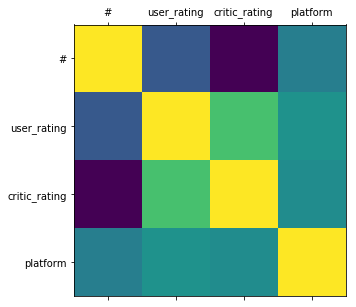

In [31]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (5,5))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

### vizualizácia datasetu

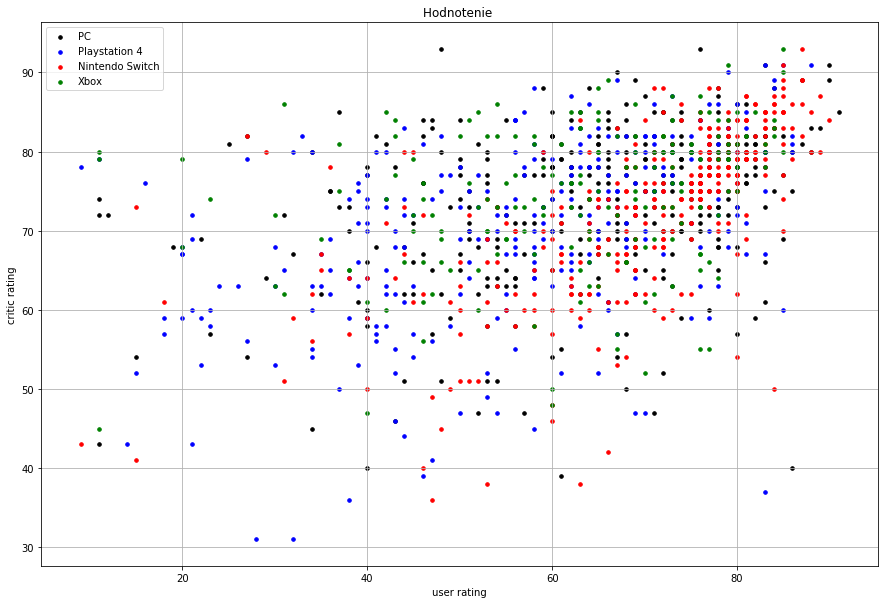

PC = 327 
Playstation 4  = 310 
Nintendo Switch = 364 
Xbox = 186 
Celkový počet hier v datasete = 1187 


In [32]:
# PC = 0
# PS4 = 1
# Nintendo Switch = 2
# Xbox = 3

x1 = np.array(df.drop(['title','#'],1))
y1 = np.array(df['platform'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0
plt.figure(figsize=(15,10))

for i in range(0,len(x1)):
    print
    if x1[i][2] == 0:
        a = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'black', marker = '.')
    elif x1[i][2]== 1:
        b = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'blue',marker = '.')
    elif x1[i][2]== 2:
        c = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'red',marker = '.')
    elif x1[i][2]== 3:
        d = plt.scatter(x1[i][0],x1[i][1], s = 50, c = 'green',marker = '.')             
        
    c1+=1



plt.xlabel("user rating")
plt.ylabel("critic rating")
plt.title("Hodnotenie ")
plt.legend((a,b,c,d),('PC','Playstation 4','Nintendo Switch','Xbox'))
plt.grid()

plt.show()

pc = len(df.loc[df['platform'] == 0])
ps4 = len(df.loc[df['platform'] == 1])
switch = len(df.loc[df['platform'] == 2])
xbox = len(df.loc[df['platform'] == 3])


print("PC = {} ".format(pc))
print("Playstation 4  = {} ".format(ps4))
print("Nintendo Switch = {} ".format(switch))
print("Xbox = {} ".format(xbox))
print("Celkový počet hier v datasete = {} ".format(len(df)))


### prevod dát do Numpy polí

In [33]:
# do X berieme stĺpce user_rating a critic_rating
x = np.array(df.drop(['platform', 'title','#'],1))

# ako Y nám bude slúžiť stĺpec platform
y = np.array(df['platform'], dtype ='float')  

y.shape = (len(y),1)  

x


array([[76., 93.],
       [48., 93.],
       [90., 91.],
       ...,
       [60., 48.],
       [40., 47.],
       [11., 45.]])

### rozdelenie dát na testovacie a trénovacie dáta 

In [34]:
#rozdelenie v pomere 7:3 ~ testovacie dáta 70%, trénovacie 30%
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.7)


### transformácia dát pre lepšie modelovanie

In [35]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

### použitie DNN modelu pre trénovacie dáta

In [36]:
#model Sequential
model = tf.keras.models.Sequential()
#vstupná vrstva
model.add(tf.keras.layers.Flatten())
#dve skryté vrstvy po 300 neurónoch s aktivačnou funkciou tanh
model.add(tf.keras.layers.Dense(300,activation = tf.nn.tanh))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.tanh))
#výstupná vrstva so štyrmi neurónmi s aktivačnou funkciou softmax
model.add(tf.keras.layers.Dense(4,activation = tf.nn.softmax))

#kompilovanie modelu s optimizerom Adamax
model.compile(optimizer = tf.optimizers.Adamax(),
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])



### naplnenie dát do modelu

In [37]:
scores = model.fit(x_f_train, y_f_train, batch_size=100, epochs=100, validation_split=0.2)


Train on 284 samples, validate on 72 samples
Epoch 1/100
284/284 [==============================] - 1s 4ms/sample - loss: 1.3361 - accuracy: 0.3908 - val_loss: 1.4122 - val_accuracy: 0.3472
Epoch 2/100
284/284 [==============================] - 0s 301us/sample - loss: 1.3125 - accuracy: 0.4225 - val_loss: 1.4382 - val_accuracy: 0.3611
Epoch 3/100
284/284 [==============================] - 0s 330us/sample - loss: 1.3129 - accuracy: 0.4331 - val_loss: 1.4022 - val_accuracy: 0.3472
Epoch 4/100
284/284 [==============================] - 0s 377us/sample - loss: 1.2991 - accuracy: 0.4472 - val_loss: 1.3841 - val_accuracy: 0.3611
Epoch 5/100
284/284 [==============================] - 0s 379us/sample - loss: 1.3026 - accuracy: 0.4472 - val_loss: 1.3723 - val_accuracy: 0.3611
Epoch 6/100
284/284 [==============================] - 0s 351us/sample - loss: 1.3011 - accuracy: 0.4401 - val_loss: 1.3781 - val_accuracy: 0.3750
Epoch 7/100
284/284 [==============================] - 0s 329us/sample - lo

Epoch 56/100
284/284 [==============================] - 0s 372us/sample - loss: 1.2881 - accuracy: 0.4225 - val_loss: 1.3826 - val_accuracy: 0.3889
Epoch 57/100
284/284 [==============================] - ETA: 0s - loss: 1.2392 - accuracy: 0.45 - 0s 271us/sample - loss: 1.2878 - accuracy: 0.4190 - val_loss: 1.3870 - val_accuracy: 0.3889
Epoch 58/100
284/284 [==============================] - 0s 385us/sample - loss: 1.2877 - accuracy: 0.4190 - val_loss: 1.3859 - val_accuracy: 0.3889
Epoch 59/100
284/284 [==============================] - 0s 390us/sample - loss: 1.2877 - accuracy: 0.4261 - val_loss: 1.3856 - val_accuracy: 0.3889
Epoch 60/100
284/284 [==============================] - 0s 370us/sample - loss: 1.2864 - accuracy: 0.4261 - val_loss: 1.3874 - val_accuracy: 0.3889
Epoch 61/100
284/284 [==============================] - 0s 331us/sample - loss: 1.2886 - accuracy: 0.4261 - val_loss: 1.3841 - val_accuracy: 0.3889
Epoch 62/100
284/284 [==============================] - 0s 404us/sampl

### validácia dát

In [38]:
print("Presnosť trénovania: %.2f%% / Chybovosť trénovania: %.2f%% "  %
      (100*scores.history['accuracy'][-1], 100*scores.history['loss'][-1]))

Presnosť trénovania: 44.37% / Chybovosť trénovania: 127.65% 


### vizualizácia presnosti a chybovosti

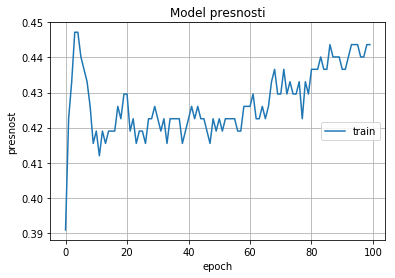

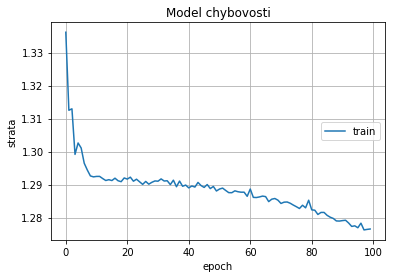

In [39]:
plt.plot(scores.history['accuracy'])

plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

plt.plot(scores.history['loss'])

plt.title('Model chybovosti')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()


# 2. DNN s použitím Sequential modelu cez Keras API


### načítanie datasetu

In [40]:
COLUMN_NAMES = ['#','title','user_rating','critic_rating','platform']

In [41]:
training_dataset = pd.read_csv('beta.csv', names = COLUMN_NAMES, header=0)
training_dataset


,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0
5,5,resident evil 2,90.0,89,0
6,6,devil may cry 5,87.0,89,0
7,7,slay the spire,69.0,89,0
8,8,asgard's wrath,84.0,88,0
9,9,sekiro: shadows die twice,78.0,88,0


### vstupné parametre

In [42]:
#x = user_rating, critic rating.. y = platform
train_x = training_dataset.iloc[:,2:4].values
train_y = training_dataset.iloc[:,4].values


In [43]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [44]:
kategoricka_premenna = np_utils.to_categorical(train_y)

In [45]:
kategoricka_premenna

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

### vytvorenie a kompilácia modelu

In [46]:
model2 = Sequential()
#vstupná vrstva s dvomi parametrami a s 300 neurónmi s aktivačnou funkciou sigmoid
model2.add(Dense(300, input_dim=2, activation='sigmoid'))
#skryté vrstva po 300 neurónoch s aktivačnou funkciou sigmoid
model2.add(Dense(300,activation='sigmoid'))
#výstupná vrstva so štyrmi neurónmi
model2.add(Dense(4))

#kompilovanie modelu pomocou optimizera Adamax
model2.compile(loss='mean_squared_error', optimizer='adamax',metrics=['accuracy'])

### naplnenie dát do modelu

In [47]:
scores2 = model2.fit(train_x, kategoricka_premenna, epochs = 100, validation_split=0.2)

Train on 949 samples, validate on 238 samples
Epoch 1/100
949/949 [==============================] - 2s 2ms/step - loss: 0.2041 - accuracy: 0.3614 - val_loss: 0.3108 - val_accuracy: 0.1597
Epoch 2/100
949/949 [==============================] - 1s 742us/step - loss: 0.1604 - accuracy: 0.4405 - val_loss: 0.3213 - val_accuracy: 0.0462
Epoch 3/100
949/949 [==============================] - 1s 756us/step - loss: 0.1624 - accuracy: 0.4320 - val_loss: 0.2996 - val_accuracy: 0.0924
Epoch 4/100
949/949 [==============================] - 1s 640us/step - loss: 0.1629 - accuracy: 0.4331 - val_loss: 0.3317 - val_accuracy: 0.0714
Epoch 5/100
949/949 [==============================] - 1s 634us/step - loss: 0.1611 - accuracy: 0.4320 - val_loss: 0.3278 - val_accuracy: 0.0000e+00
Epoch 6/100
949/949 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.46 - 1s 623us/step - loss: 0.1576 - accuracy: 0.4658 - val_loss: 0.3217 - val_accuracy: 0.0924
Epoch 7/100
949/949 [===================

949/949 [==============================] - 1s 699us/step - loss: 0.1530 - accuracy: 0.4710 - val_loss: 0.3360 - val_accuracy: 0.0420
Epoch 57/100
949/949 [==============================] - 1s 750us/step - loss: 0.1580 - accuracy: 0.4826 - val_loss: 0.3228 - val_accuracy: 0.0630
Epoch 58/100
949/949 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.45 - 1s 707us/step - loss: 0.1569 - accuracy: 0.4521 - val_loss: 0.3567 - val_accuracy: 0.0000e+00
Epoch 59/100
949/949 [==============================] - 1s 639us/step - loss: 0.1533 - accuracy: 0.4847 - val_loss: 0.3285 - val_accuracy: 0.0546
Epoch 60/100
949/949 [==============================] - 1s 612us/step - loss: 0.1586 - accuracy: 0.4763 - val_loss: 0.3724 - val_accuracy: 0.0000e+00
Epoch 61/100
949/949 [==============================] - 1s 623us/step - loss: 0.1589 - accuracy: 0.4542 - val_loss: 0.3545 - val_accuracy: 0.0000e+00
Epoch 62/100
949/949 [==============================] - 1s 625us/step - loss: 0.159

### evaluácia modelu

In [48]:
 model2.evaluate(train_x, kategoricka_premenna)

1187/1187 [==============================] - 0s 372us/step


[0.18566525587537455, 0.4026958644390106]

### validácia modelu

In [49]:
print("Presnosť trénovania: %.2f%% / Chybovosť trénovania: %.2f%% "  %
      (100*scores2.history['accuracy'][-1], 100*scores2.history['loss'][-1]))

Presnosť trénovania: 49.00% / Chybovosť trénovania: 15.38% 


### vizualizácia presnosti a chybovosti

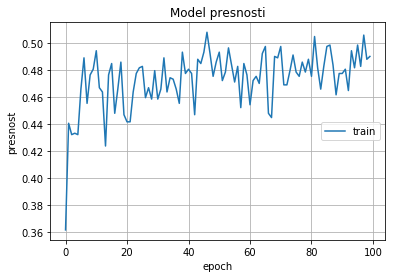

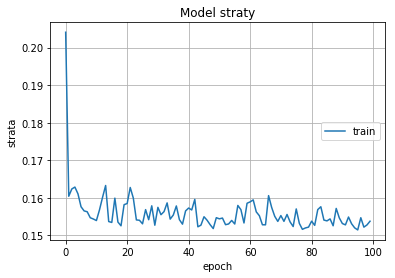

In [50]:
plt.plot(scores2.history['accuracy'])


plt.title('Model presnosti')
plt.ylabel('presnost')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

plt.plot(scores2.history['loss'])


plt.title('Model straty')
plt.ylabel('strata')
plt.xlabel('epoch')
plt.legend(['train'], loc='center right')
plt.grid()
plt.show()

### porovnanie vizualizácie presnosti a chybovosti v oboch modeloch

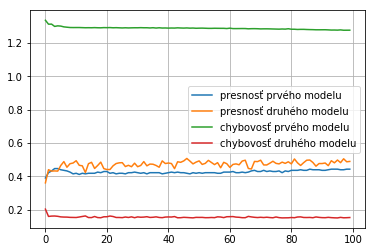

In [51]:
plt.plot(scores.history['accuracy'], label = 'presnosť prvého modelu')
plt.plot(scores2.history['accuracy'], label = 'presnosť druhého modelu')
plt.plot(scores.history['loss'], label = 'chybovosť prvého modelu')
plt.plot(scores2.history['loss'], label = 'chybovosť druhého modelu')
plt.grid()
plt.legend()